In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [34]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [7]:
sns.set_style(style='whitegrid')

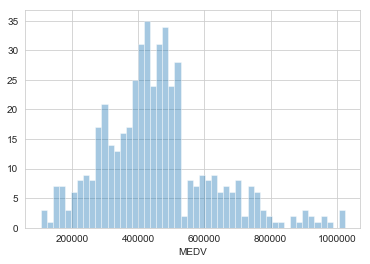

In [11]:
sns.distplot(df['MEDV'],bins=50,kde=False)

In [12]:
df.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [13]:
y = df['MEDV']

In [14]:
X = df[['RM', 'LSTAT', 'PTRATIO']]

In [16]:
from sklearn.cross_validation import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lm.intercept_

527399.5922670069

In [23]:
print(lm.coef_)

[ 72236.48589797 -11275.51960126 -20615.75810014]


In [24]:
predictions = lm.predict(X_test)

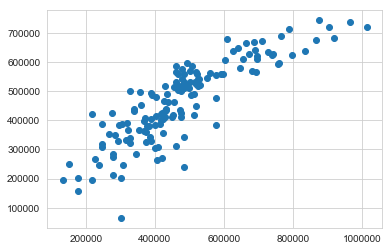

In [25]:
plt.scatter(y_test,predictions)

In [26]:
from sklearn import metrics

In [27]:
metrics.mean_absolute_error(y_test,predictions)

67733.4461852008

In [28]:
metrics.mean_squared_error(y_test,predictions)

8224357537.475131

In [31]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

90688.24365635896

In [32]:
metrics.explained_variance_score(y_test,predictions)

0.7247295287741902

C:\Users\harika.ponnada\AppData\Local\Programs\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


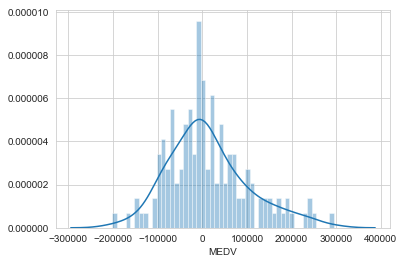

In [33]:
sns.distplot((y_test-predictions),bins=50)